In [36]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
# Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'e4c4dda8-b111-4f91-9a0b-9e82aa7631b9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# Into the Anaconda Prompt to change this to allow to pull data
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
    
# If that didn't work try using the local host URL from prompt

In [37]:
type(data)

dict

In [62]:
import pandas as pd 

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

In [66]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'e4c4dda8-b111-4f91-9a0b-9e82aa7631b9',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#NOTE:
# Into the Anaconda Prompt to change this to allow to pull data
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    df

    # Use this to create a csv and append data to it
    if not os.path.isfile(r'C:\Users\rumma\CODES\API.csv'):
        df.to_csv(r'C:\Users\rumma\CODES\API.csv', header='column_name')
    else:
        df.to_csv(r'C:\Users\rumma\CODES\API.csv', mode='a', header= False)

# If that didn't work try using the local host URL from prompt

In [68]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(30) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv(r'C:\Users\rumma\CODES\API.csv')
df

In [124]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df

In [126]:
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.07460,1.16574,-2.44419,3.37064,-3.86386,10.02874
Ethereum,0.32070,1.62258,-1.73409,-18.01358,-31.79558,-18.19436
Tether USDt,-0.00564,0.00247,-0.13822,0.07325,0.00485,-0.11622
XRP,0.00033,0.71271,-9.08000,-2.16286,0.60936,251.09676
Solana,-0.28669,1.42440,-3.49724,8.52377,-12.56605,-4.92829
BNB,0.13190,-1.77176,2.28228,-12.01884,-14.68310,-2.90651
USDC,-0.00689,-0.00488,-0.01046,0.00660,0.01736,0.00774
Dogecoin,0.23506,0.90070,-6.90606,-24.22772,-38.61262,-35.09078
Cardano,0.22963,2.16877,-9.66977,-25.56416,-38.54667,21.87748


In [ ]:
df2= df1.stack()
df2

In [88]:
type(df2)

pandas.core.series.Series

In [ ]:
df3 = df2.to_frame(name='values')
df3

In [106]:
df3.count()

values    90
dtype: int64

In [ ]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. Can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

df4 = df3.reset_index()
df4

In [ ]:
# Change the column name

df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

In [ ]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df5

In [112]:
# Visualization

import seaborn as sns
import matplotlib.pyplot as plt

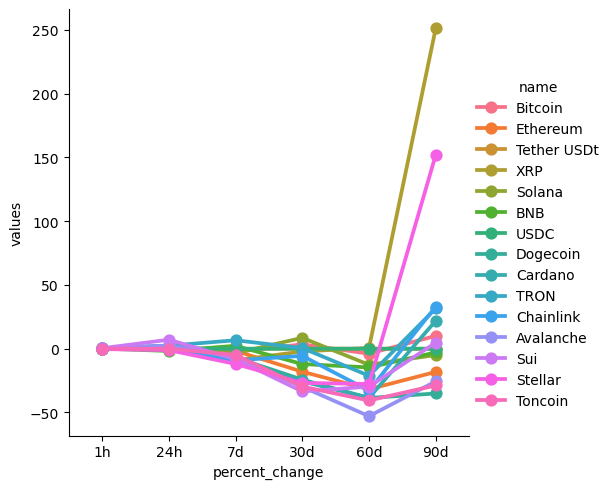

In [120]:
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

In [144]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,97283.76276,2025-02-11 00:24:39.995241
15,Bitcoin,97291.05577,2025-02-11 00:42:10.434529
30,Bitcoin,97306.67371,2025-02-11 00:42:41.301781
45,Bitcoin,97306.67371,2025-02-11 00:43:12.407805
60,Bitcoin,97306.67371,2025-02-11 00:43:43.396918
75,Bitcoin,97306.67371,2025-02-11 00:44:14.380019
90,Bitcoin,97283.76276,2025-02-11 00:24:39.995241
105,Bitcoin,97291.05577,2025-02-11 00:42:10.434529
120,Bitcoin,97306.67371,2025-02-11 00:42:41.301781
135,Bitcoin,97306.67371,2025-02-11 00:43:12.407805


In [146]:
df6.count()

name               30
quote.USD.price    30
timestamp          30
dtype: int64

<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

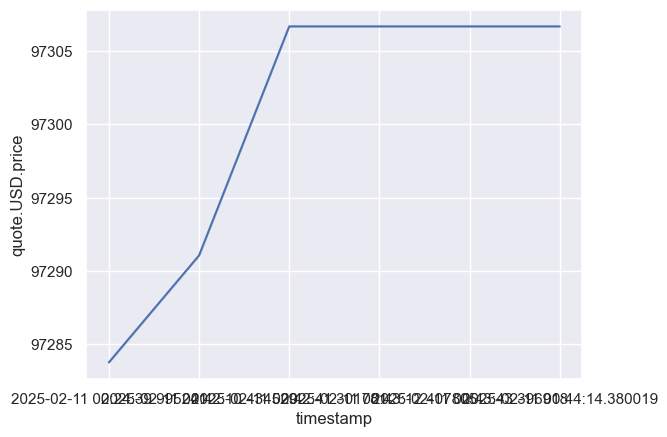

In [132]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df6)